# Linear Regression

In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('homeprices.csv')
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


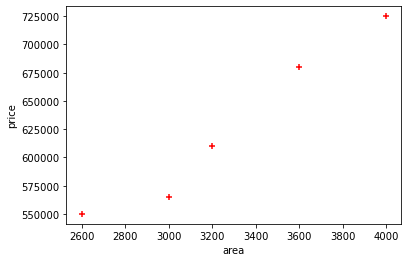

In [3]:
%matplotlib inline
plt.xlabel('area')
plt.ylabel('price')
plt.scatter(df.area,df.price,color='red',marker='+')

In [4]:
new_df=df.drop('price',axis='columns')
new_df  

,area
0,2600
1,3000
2,3200
3,3600
4,4000


In [5]:
price=df.price
price

0    550000
1    565000
2    610000
3    680000
4    725000
Name: price, dtype: int64

In [6]:
#CREATE LINEAR REGRESSION OBJECT
reg=linear_model.LinearRegression()
reg.fit(new_df,price)

LinearRegression()

In [7]:
reg.predict([[3300]])

array([628715.75342466])

In [8]:
reg.coef_

array([135.78767123])

In [9]:
reg.intercept_

180616.43835616432

In [10]:
3300*135.78767123+180616.43835616432

628715.7534151643


# Linear Regression with multiple variable


In [11]:
df=pd.read_csv('home_prices.csv')
print(df)

   area  bedrooms  age   price
0  2600         3   20  550000
1  3000         4   15  565000
2  3200         3   18  610000
3  3600         3   30  595000
4  4000         5    8  760000
5  4100         6    8  810000


In [12]:
reg=linear_model.LinearRegression()
reg.fit(df[['area','bedrooms','age']],df.price)

LinearRegression()

In [13]:
reg.predict([[3000,3,40]])

array([486498.55212355])

In [14]:
reg.coef_

array([  119.67905405, 13097.24903475, -4207.28764479])

In [15]:
reg.intercept_

256461.14864864887

In [16]:

110.05067568*3000+9586.14864865*3+-6140.2027027 *40+330295.6081081082

443597.9729860582

# Polynomial Regression


In [17]:
dataset=pd.read_csv("Position_Salaries.csv")

In [18]:
dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [19]:
x=dataset.iloc[:,1:2].values

In [20]:
x

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [21]:
y=dataset.iloc[:,2:].values

In [22]:
y

array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000]], dtype=int64)

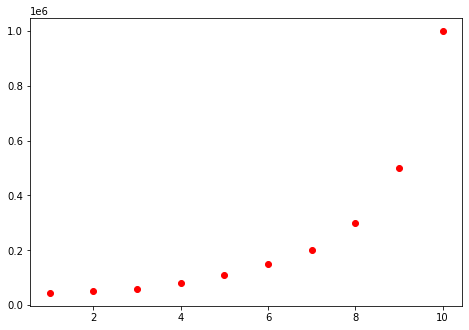

In [23]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(x,y,color='r')

In [24]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [25]:
poly=PolynomialFeatures(degree=4)
x_poly=poly.fit_transform(x)

In [26]:
polyreg=LinearRegression()
polyreg.fit(x_poly,y)

LinearRegression()

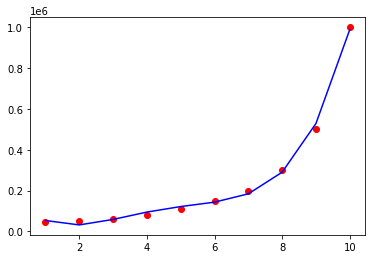

In [27]:
plt.scatter(x,y,color='r')
plt.plot(x,polyreg.predict(poly.fit_transform(x)),color='b')

In [28]:
polyreg.predict(poly.fit_transform([[10]]))

array([[988916.08391567]])

In [29]:
poly=PolynomialFeatures(degree=3)
x_poly=poly.fit_transform(x)

In [30]:
polyreg=LinearRegression()
polyreg.fit(x_poly,y)

LinearRegression()

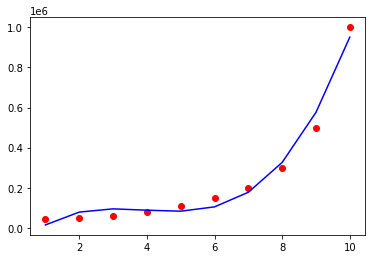

In [31]:
plt.scatter(x,y,color='r')
plt.plot(x,polyreg.predict(poly.fit_transform(x)),color='b')

# Ridge regression 

Ridge regression is a method for estimating the parameters of a linear regression model in scenarios where variables are highly correlated.
It has been used in many fields including econometrics, chemistry, and engineering

In [32]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from numpy import absolute
from numpy import mean
from numpy import std

In [33]:
df2=pd.read_csv('housing.csv')
print(df2)

     0.00632  18.00  2.310  0  0.5380  6.5750  65.20  4.0900  1  296.0  15.30  \
0    0.02731    0.0   7.07  0   0.469   6.421   78.9  4.9671  2  242.0   17.8   
1    0.02729    0.0   7.07  0   0.469   7.185   61.1  4.9671  2  242.0   17.8   
2    0.03237    0.0   2.18  0   0.458   6.998   45.8  6.0622  3  222.0   18.7   
3    0.06905    0.0   2.18  0   0.458   7.147   54.2  6.0622  3  222.0   18.7   
4    0.02985    0.0   2.18  0   0.458   6.430   58.7  6.0622  3  222.0   18.7   
..       ...    ...    ... ..     ...     ...    ...     ... ..    ...    ...   
500  0.06263    0.0  11.93  0   0.573   6.593   69.1  2.4786  1  273.0   21.0   
501  0.04527    0.0  11.93  0   0.573   6.120   76.7  2.2875  1  273.0   21.0   
502  0.06076    0.0  11.93  0   0.573   6.976   91.0  2.1675  1  273.0   21.0   
503  0.10959    0.0  11.93  0   0.573   6.794   89.3  2.3889  1  273.0   21.0   
504  0.04741    0.0  11.93  0   0.573   6.030   80.8  2.5050  1  273.0   21.0   

     396.90  4.98  24.00  


In [34]:
data = df2.values
X, y = data[:, :-1], data[:, -1]

Confusingly, the lambda term can be configured via the “alpha” argument when defining the class. The default value is 1.0 or a full penalty.

In [35]:
# define model
model = Ridge(alpha=1.0)

We can evaluate the Ridge Regression model on the housing dataset using repeated 10-fold cross-validation and report the average mean absolute error (MAE) on the dataset.

In [36]:
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

In [37]:
# evaluate model
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

In [38]:
# force scores to be positive
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean MAE: 3.380 (0.342)


In [39]:
# fit model
model.fit(X, y)

Ridge()

In [40]:
# define new data
row = [0.00632,18.00,2.310,0,0.5380,6.5750,65.20,4.0900,1,296.0,15.30,396.90,4.98]

Predictions on new data can be achieved by fitting the model on all available data and calling the predict() function, passing in a new row of data.

In [55]:
# make a prediction
yhat = model.predict([row])

In [42]:
# summarize prediction
print('Predicted: %.3f' % yhat)

Predicted: 30.359


# Lasso Regression

In [43]:
from sklearn.linear_model import Lasso

In [44]:
df2.head()

,0.00632,18.00,2.310,0,0.5380,6.5750,65.20,4.0900,1,296.0,15.30,396.90,4.98,24.00
0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
1,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
4,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7


In [45]:
data = df2.values
X, y = data[:, :-1], data[:, -1]

In [46]:
# define model
model = Lasso(alpha=1.0)

In [47]:
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

In [48]:
# evaluate model
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

In [49]:
# force scores to be positive
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean MAE: 3.717 (0.385)


In [50]:
# fit model
model.fit(X, y)

Lasso()

In [51]:
# define new data
row = [0.00632,18.00,2.310,0,0.5380,6.5750,65.20,4.0900,1,296.0,15.30,396.90,4.98]

In [52]:
# make a prediction
yhat = model.predict([row])

In [53]:
# summarize prediction
print('Predicted: %.3f' % yhat)

Predicted: 31.068
